# DATA 512 - Assignment 1: Data Curation

## Nicholas Wapstra

The following libraries are imported to complete the data acquisition, analysis, and visualization:

## Step 1: Gathering the data

In [74]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Allows for inline plotting in the Jupyter Notebook
%matplotlib inline 

The endpoints are stored for both the Legacy and Pageviews APIs to be accessed for the API calls. The parameters are stored in the url's in brackets "{}".

In [75]:
endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'
endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

The parameters for each API query required were stored in dictionary objects. The queries include the Legacy desktop and mobile views, and the Pageviews desktop, mobile app, and mobile web views. In order to access an entire month's worth of data, you should list the first day of the following month as the "end" of collection. User information is stored in the "headers" object.

In [76]:
# Legacy Desktop
params_legacy_desktop = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2008010100",
                 "end" : "2016080100"
                    }

# Legacy Mobile
params_legacy_mobile = {"project" : "en.wikipedia.org",
                 "access-site" : "mobile-site",
                 "granularity" : "monthly",
                 "start" : "2008010100",
                 "end" : "2016080100"
                    }

# Pageviews Desktop
params_pageviews_desktop = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    "end" : '2020090100'
                        }

# Pageviews Mobile App
params_pageviews_mobileapp = {"project" : "en.wikipedia.org",
                    "access" : "mobile-app",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    "end" : '2020090100'
                        }

# Pageviews Mobile Web
params_pageviews_mobileweb = {"project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    "end" : '2020090100'
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/nickwap44',
    'From': 'nickwap4@uw.edu'
}

An API call function is defined that takes the endpoint url and parameters as arguments. A json file with the results of the query is returned.

In [77]:
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

5 API queries were made to capture the views from the Legacy API desktop and mobile views, and the Pageviews API desktop, mobile app, and mobile web views.

In [78]:
legacy_desktop = api_call(endpoint_legacy, params_legacy_desktop)
legacy_mobile = api_call(endpoint_legacy, params_legacy_mobile)
pageviews_desktop = api_call(endpoint_pageviews, params_pageviews_desktop)
pageviews_mobileapp = api_call(endpoint_pageviews, params_pageviews_mobileapp)
pageviews_mobileweb = api_call(endpoint_pageviews, params_pageviews_mobileweb)

The results of the raw queries were stored in individual json files.

In [79]:
with open('legacy_desktop-site_200801-201607.json', 'w') as outfile:
    json.dump(legacy_desktop,outfile)
    
with open('legacy_mobile-site_200801-201607.json', 'w') as outfile:
    json.dump(legacy_mobile,outfile)
    
with open('pageviews_desktop_201507-202008.json', 'w') as outfile:
    json.dump(pageviews_desktop,outfile)
    
with open('pageviews_mobile-app_201507-202008.json', 'w') as outfile:
    json.dump(pageviews_mobileapp,outfile)
    
with open('pageviews_mobile-web_201507-202008.json', 'w') as outfile:
    json.dump(pageviews_mobileweb,outfile)

## Step 2: Processing the data

The results of the queries were stored in Pandas dataframes for easier data manipulation. Within the queries, the values of interest were stored within the 'items' object so these needed to be extracted.

In [80]:
legacy_desktop = pd.DataFrame(legacy_desktop['items'])
legacy_mobile = pd.DataFrame(legacy_mobile['items'])
pageviews_desktop = pd.DataFrame(pageviews_desktop['items'])
pageviews_mobileapp = pd.DataFrame(pageviews_mobileapp['items'])
pageviews_mobileweb = pd.DataFrame(pageviews_mobileweb['items'])

The contents of the dataframes were examined to make sure that the data was transferred properly, the column headers lined up, and the observation counts were correct.

In [81]:
display(legacy_desktop)
display(pageviews_desktop)

,project,access-site,granularity,timestamp,count
0,en.wikipedia,desktop-site,monthly,2008010100,4930902570
1,en.wikipedia,desktop-site,monthly,2008020100,4818393763
2,en.wikipedia,desktop-site,monthly,2008030100,4955405809
3,en.wikipedia,desktop-site,monthly,2008040100,5159162183
4,en.wikipedia,desktop-site,monthly,2008050100,5584691092
...,...,...,...,...,...
98,en.wikipedia,desktop-site,monthly,2016030100,5407676056
99,en.wikipedia,desktop-site,monthly,2016040100,5572235399
100,en.wikipedia,desktop-site,monthly,2016050100,5330532334
101,en.wikipedia,desktop-site,monthly,2016060100,4975092447


,project,access,agent,granularity,timestamp,views
0,en.wikipedia,desktop,user,monthly,2015070100,4376666686
1,en.wikipedia,desktop,user,monthly,2015080100,4332482183
2,en.wikipedia,desktop,user,monthly,2015090100,4485491704
3,en.wikipedia,desktop,user,monthly,2015100100,4477532755
4,en.wikipedia,desktop,user,monthly,2015110100,4287720220
...,...,...,...,...,...,...
57,en.wikipedia,desktop,user,monthly,2020040100,3798372613
58,en.wikipedia,desktop,user,monthly,2020050100,3078093615
59,en.wikipedia,desktop,user,monthly,2020060100,2721328557
60,en.wikipedia,desktop,user,monthly,2020070100,2638936132


For the Legacy API table, the name of the 'count' columns for each query were renamed to 'pagecount_desktop_views' and 'pagecount_mobile_views' respectively in order to preserve the meaning of the values. The 'project', 'access-site', 'granularity', and 'count' columns were removed because they were no longer needed. The desktop and mobile data were then merged on the 'timestamp' variable. 'timestamp' is used as the key identifier because it is the same value in all tables irrespective of source. A left merge is needed because mobile tracking of website views did not begin until around 2014. Therefore, all months with desktop views are preserved.

In [82]:
legacy_desktop['pagecount_desktop_views'] = legacy_desktop['count']
legacy_desktop = legacy_desktop.drop(['project','access-site','granularity','count'], axis=1)
legacy_mobile['pagecount_mobile_views'] = legacy_mobile['count']
legacy_mobile = legacy_mobile.drop(['project','access-site','granularity','count'], axis=1)
legacy = pd.merge(legacy_desktop,legacy_mobile,how='left',on='timestamp')

NA values were replaced with '0' values. The number of total views was calculated by summing together the desktop and mobile views.

In [83]:
legacy.fillna(0, inplace=True)
legacy['pagecount_all_views'] = legacy['pagecount_desktop_views'] + legacy['pagecount_mobile_views']

For the Pageviews API table, the name of the 'count' columns for each query were renamed to 'pageviews_desktop_views', 'pageviews_mobileapp_views', and 'pageviews_mobileweb_views' respectively in order to preserve the meaning of the values. The 'project', 'access, 'agent', 'granularity', and 'views' columns were removed because they were no longer needed. The desktop, mobile app, and mobile web data were then merged on the 'timestamp' variable. 'timestamp' is used as the key identifier because it is the same value in all tables irrespective of source.

In [84]:
pageviews_desktop['pageview_desktop_views'] = pageviews_desktop['views']
pageviews_desktop = pageviews_desktop.drop(['project','access','agent','granularity','views'], axis=1)
pageviews_mobileapp['pageview_mobileapp_views'] = pageviews_mobileapp['views']
pageviews_mobileapp = pageviews_mobileapp.drop(['project','access','agent','granularity','views'], axis=1)
pageviews_mobileweb['pageview_mobileweb_views'] = pageviews_mobileweb['views']
pageviews_mobileweb = pageviews_mobileweb.drop(['project','access','agent','granularity','views'], axis=1)
pageviews = pd.merge(pageviews_desktop,pageviews_mobileapp,on='timestamp')
pageviews = pd.merge(pageviews,pageviews_mobileweb,on='timestamp')

The number of mobile views was calculated by summing the mobile app and mobile web views. The mobile app and mobile web views were then removed from the table. The number of total views was calculated by summing together the desktop and mobile views.

In [85]:
pageviews['pageview_mobile_views'] = pageviews['pageview_mobileapp_views'] + pageviews['pageview_mobileweb_views']
pageviews = pageviews.drop(['pageview_mobileapp_views','pageview_mobileweb_views'], axis=1)
pageviews['pageview_all_views'] = pageviews['pageview_desktop_views'] + pageviews['pageview_mobile_views']

The Legacy API and Pageviews API tables were merged on 'timestamp' using an outer join to preserve all data. While there is an overlap between the two API queries, for the most part they examined different timepoints so all values were of interest. NA's were replaces with 0's. The hours and minutes were removed from 'timestamp' and the value was split into 'year' and 'month'. 'timestamp' was removed from the table.

In [86]:
table = pd.merge(legacy,pageviews,how='outer',on='timestamp')
table.fillna(0, inplace=True)
table['timestamp'] = table['timestamp'].str[:-4]
table['year'] = table['timestamp'].str.slice(start=0,stop=4)
table['month'] = table['timestamp'].str.slice(start=4,stop=6)
table = table.drop(['timestamp'], axis=1)

The final data table was converted to a csv file.

In [87]:
table.to_csv('en-wikipedia_traffic_200801-202008.csv',index=False)

## Step 3: Analyze the data

To prepare for the visualization, the views in all columns were scaled down by a factor of 1,000,000.

In [88]:
table['pagecount_desktop_views'] = table['pagecount_desktop_views'] / 1000000
table['pagecount_mobile_views'] = table['pagecount_mobile_views'] / 1000000
table['pagecount_all_views'] = table['pagecount_all_views'] / 1000000
table['pageview_desktop_views'] = table['pageview_desktop_views'] / 1000000
table['pageview_mobile_views'] = table['pageview_mobile_views'] / 1000000
table['pageview_all_views'] = table['pageview_all_views'] / 1000000

In order to prevent the 0 values from being plotted, the 0's in the 'views' columns were reconverted into NaN values which matplotlib doesn't plot.

In [89]:
cols = ['pagecount_desktop_views','pagecount_mobile_views','pagecount_all_views','pageview_desktop_views','pageview_mobile_views','pageview_all_views']
table[cols] = table[cols].replace(0, np.nan)

The 'month' and 'year' columns were merged to create a 'date' column that could be used for time series plotting.

In [90]:
table['date'] = table['month'].map(str)+ '-' + table['year'].map(str)
table['date'] = pd.to_datetime(table['date'], format = '%m-%Y')

The plot of page views was generated by specifying the figure font and size. The X-axis label was created to notify users of the switch to Pageview that eliminated crawler traffic from the dataset. All 'views' variables were plotted. Green represented desktop views, blue represented mobile views, and black represented total views. The "pre-pageviews" data was highlighted by using a dashed line type and "post-pageviews" was plotted as a solid line. The y-axis range was set from 0-12000. The title was set as 'Page Views on English Wikipedia (x 1,000,000)'. The grid view was set to on and the legend was placed in the upper left of the plot. The figure was then saved as a .png file.

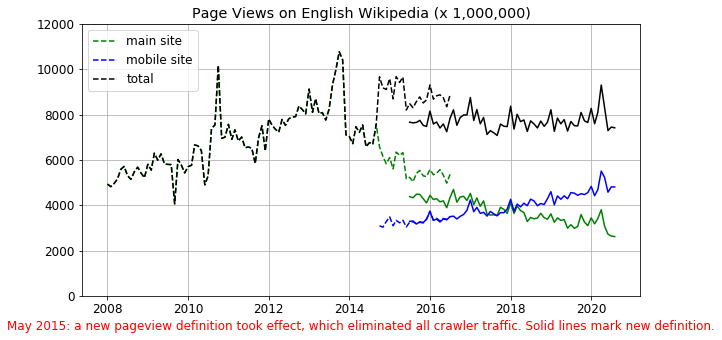

In [91]:
plt.rc('font',size=12)
fig, ax = plt.subplots(figsize=(10,5))

plt.xlabel("May 2015: a new pageview definition took effect, which eliminated all crawler traffic. Solid lines mark new definition.",color = 'red')

ax.plot(table.date,table.pagecount_desktop_views,color='green', linestyle='--',label = 'main site')
ax.plot(table.date,table.pagecount_mobile_views,color='blue',linestyle='--',label='mobile site')
ax.plot(table.date,table.pagecount_all_views,color='black',linestyle='--',label='total')
ax.plot(table.date,table.pageview_desktop_views,color='green')
ax.plot(table.date,table.pageview_mobile_views,color='blue')
ax.plot(table.date,table.pageview_all_views,color='black')

plt.ylim(0,12000)

ax.set_title('Page Views on English Wikipedia (x 1,000,000)')
ax.grid(True)
ax.legend(loc='upper left')

plt.savefig('data-512-a1.png');